In [89]:
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 
import torch
import random
import numpy as np
import graphviz
from sklearn import tree

# Дерево решений 


Темы:
1. Что такое дерево решений? 
2. Как выбрать какие вопросы сначала задавать? (Джини и Энтропия)
3. Class DecisionTreeClassifier
4. Глубина дерева 
5. Тренировка
6. Сравнение с лог регрессией 

1. Что такое дерево решений ?

Это алгоритм принятия решений.
Каждое поддерево это признак, каждый лист это класс

![title](tree.png)

# Джини 

Допустим у нас есть три признака по которым мы можем классифицировать наши данные на два класса .Чтобы определить, какое из трех разделений лучше, мы вводим концепцию под названием **примеси**.

Чтобы вычислить примесь Джини листе, мы вычитаем 1 из доли класса, относящимся к этому признаку в квадрате, и доли классов, не стносящимся к этому признаку , в квадрате.

$$impurity = 1 - (\frac{T}{F+T})^2 - (\frac{F}{F+T})^2$$

Примесь Джини для самого узла составляет 1 минус доля выборок в левом дочернем элементе, минус доля выборок в правом дочернем элементе.

$$impurity_n = 1 - (\frac{R}{R+L})^2 - (\frac{L}{R+L})^2$$

Получение информации (с индексом Джини) записывается следующим образом. ( Information gain)


$$Informationgain(Q) = impurity_n - impurtity_{L}(\frac{R}{L+R})^2 - impurtity_{R}(\frac{L}{L+R})^2 $$

Этот процесс повторяется для каждого признака. В конечном итоге мы принимаем решение о расколе с наибольшим выигрышем информации.max(Informationgain)

# Энтропия

Энтропия Шеннона определяется для системы с $N$ возможными состояниями следующим образом:
    $$ S = - \sum_{k=1}^N p_k*log_2(p_k) $$
где $p_k$ – вероятности нахождения системы в $k$-ом состоянии.

Получение информации (Энтропия) записывается следующим образом. ( Information gain)
$$𝐼𝑛𝑓𝑜𝑟𝑚𝑎𝑡𝑖𝑜𝑛𝑔𝑎𝑖𝑛(Q) = S - \sum_{i=1}^q \frac{N_i}{N} * S_i $$
где $Q$ -  признак по которому происходит разбиение, $q$ - число групп после разбиения ,  $N_i$ - число элементов выборки,
$S_i$ - энтропия выборки.

Этот процесс повторяется для каждого признака. В конечном итоге мы принимаем решение о расколе с наибольшим выигрышем

# Sklearn
Для обучения модели есть встроенный классификатор DecisionTreeClassifier
* max_depth - максимальная длина дерева
* criterion - изменение качества раскола(энтропия , джини) 
* random_state - установка сида 
* min_impurity_decrease  - порог для ранней остановки роста деревьев

Возьмом дата сет (diabetes) и на нем посмотрим как работает классификатор

# Загружаем датасет 

In [90]:
df = pd.read_csv("diabetes.csv")
df.head(10000)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [91]:
x = df.loc[:,'Pregnancies':'Age']
y=df['Outcome']

# Тренирока
## Джини

In [92]:
# Разделим наш датасет на train и test
x_train, x_test, y_train ,y_test = train_test_split(x, y, test_size = 0.3, random_state = 11) 
# Создаем классификатор 
clf = DecisionTreeClassifier(criterion = "gini",random_state = 11)
# Обучаем 
clf = clf.fit(x_train,y_train)
# Предсказываем
y_pred = clf.predict(x_test)

In [93]:
print("Предсказания для трейна : {:f}".format(clf.score(x_train,y_train)))
print("Предсказания для теста : {:f}".format(clf.score(x_test,y_test)))

Предсказания для трейна : 1.000000
Предсказания для теста : 0.705628


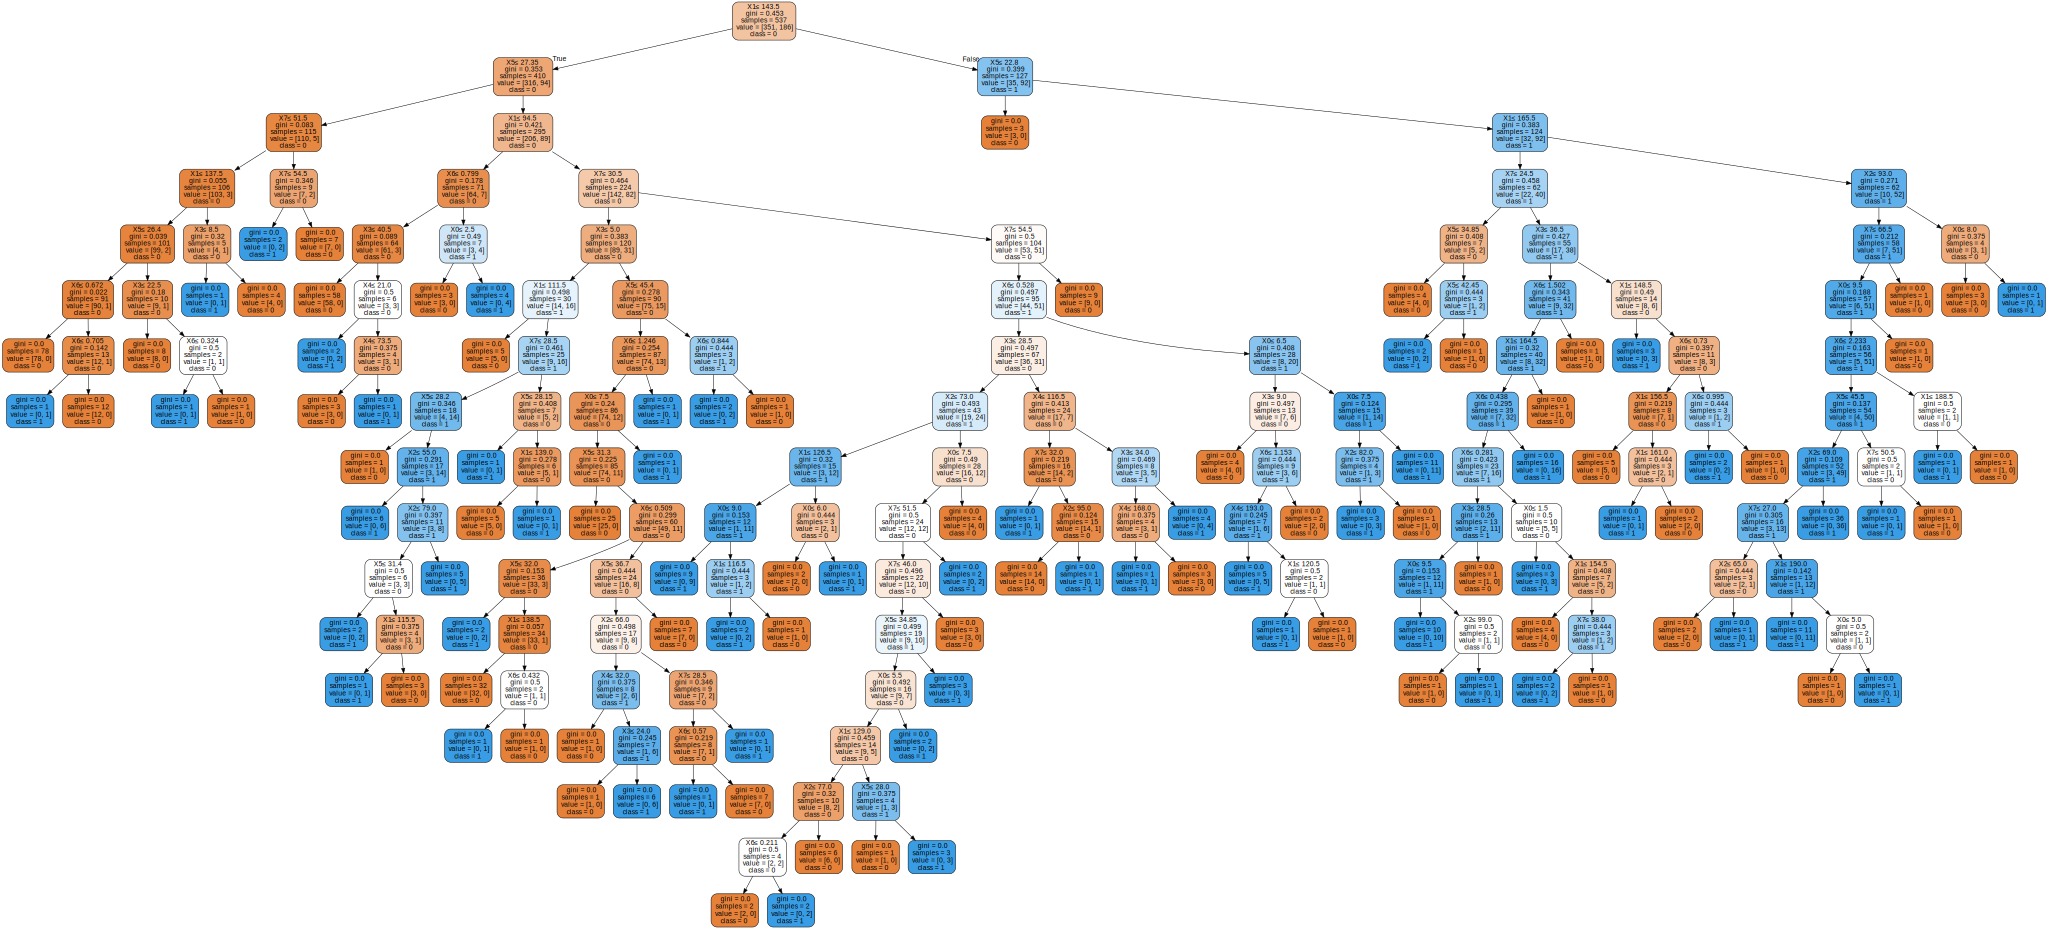

In [94]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 

dot_data = tree.export_graphviz(clf, out_file=None, 
                          feature_names=None,  
                          class_names=['0','1'],  
                          filled=True, rounded=True,  
                          special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

## Максимальная глубина дерева 

In [95]:
# Создаем классификатор , с максимальной глубиной дерева в 3 
clf2 = DecisionTreeClassifier(criterion = "gini", max_depth = 3 , random_state = 11 )
# Обучаем 
clf2 = clf2.fit(x_train,y_train)
# Предсказываем
y_pred = clf2.predict(x_test)

In [96]:
print("Предсказания для трейна : {:f}".format(clf2.score(x_train,y_train)))
print("Предсказания для теста : {:f}".format(clf2.score(x_test,y_test)))

Предсказания для трейна : 0.765363
Предсказания для теста : 0.727273


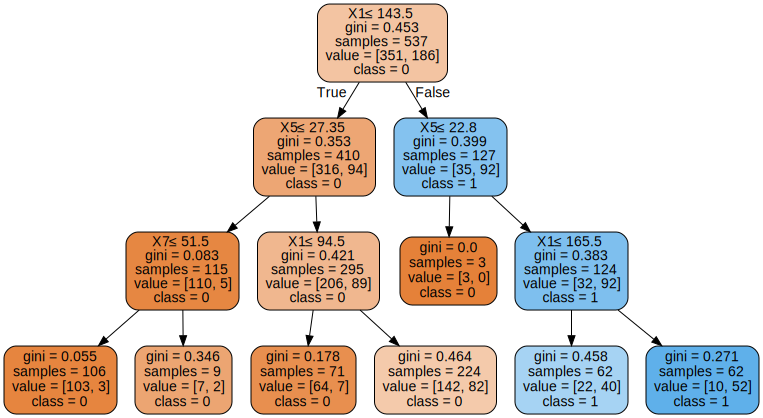

In [97]:
import graphviz 
dot_data = tree.export_graphviz(clf2, out_file=None) 
graph = graphviz.Source(dot_data) 

dot_data = tree.export_graphviz(clf2, out_file=None, 
                          feature_names=None,  
                          class_names=['0','1'],  
                          filled=True, rounded=True,  
                          special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

Качество возросло, хотя размера дерева уменьшился.Частно деревья используются для выявления главных признаков, чтобы уменьшить
выборку и увеличить скорость обучения.

## Макс Глубина + Энтропия

In [98]:
# Создаем классификатор , с максимальной глубиной дерева в 3 
clf3 = DecisionTreeClassifier(criterion = "entropy", max_depth = 3 , random_state = 11 )
# Обучаем 
clf3 = clf3.fit(x_train,y_train)
# Предсказываем
y_pred = clf3.predict(x_test)

In [99]:
print("Предсказания для трейна : {:f}".format(clf3.score(x_train,y_train)))
print("Предсказания для теста : {:f}".format(clf3.score(x_test,y_test)))

Предсказания для трейна : 0.769088
Предсказания для теста : 0.714286


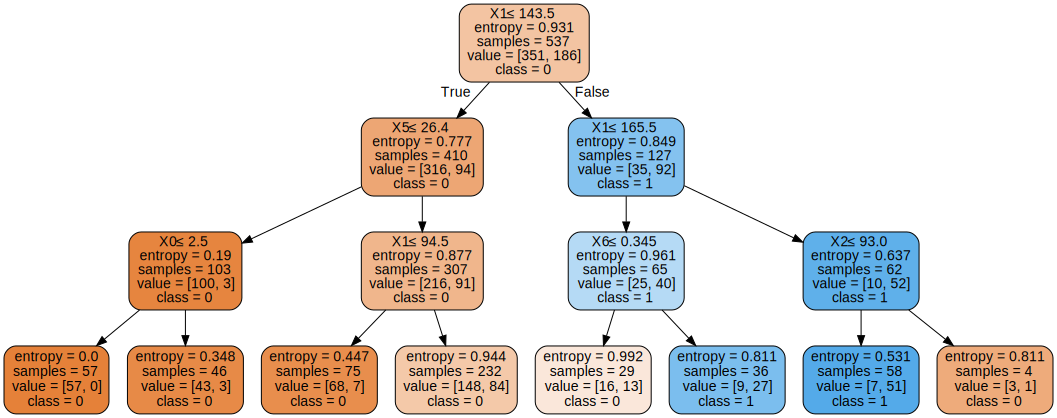

In [100]:
import graphviz 
dot_data = tree.export_graphviz(clf3, out_file=None) 
graph = graphviz.Source(dot_data) 

dot_data = tree.export_graphviz(clf3, out_file=None, 
                          feature_names=None,  
                          class_names=['0','1'],  
                          filled=True, rounded=True,  
                          special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

# Сравнение 

##  Создаем датасет

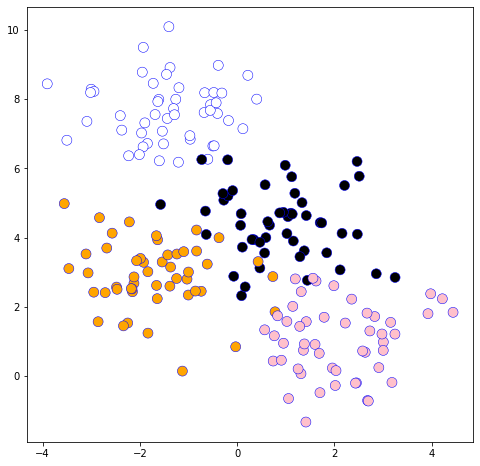

In [101]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

from sklearn import datasets
from matplotlib.colors import ListedColormap


data = datasets.make_blobs(n_samples=[50, 50, 50,50], centers=None, n_features= 2, random_state=0)

colors = ListedColormap(['black', 'pink','orange','white'])

plt.figure(figsize=(8, 8))
plt.scatter([x[0] for x in data[0]], [x[1] for x in data[0]], c=data[1],s=100 ,cmap=colors,edgecolors='blue',linewidth=0.5);

### Обучаем дерево 

In [102]:
np.random.seed(12)
shuffle_index = np.random.permutation(data[0].shape[0])
x, y = data[0][shuffle_index], data[1][shuffle_index]

In [103]:
# Разделим наш датасет на train и test
x_train, x_test, y_train ,y_test = train_test_split(x, y, test_size = 0.3, random_state = 11) 
# Создаем классификатор 
clf4 = DecisionTreeClassifier(criterion = "entropy",random_state = 11,max_depth = 3)
# Обучаем 
clf4 = clf4.fit(x_train,y_train)
# Предсказываем
y_pred = clf4.predict(x_test)

In [104]:
print("Предсказания для трейна : {:f}".format(clf4.score(x_train,y_train)))
print("Предсказания для теста : {:f}".format(clf4.score(x_test,y_test)))

Предсказания для трейна : 0.971429
Предсказания для теста : 0.883333


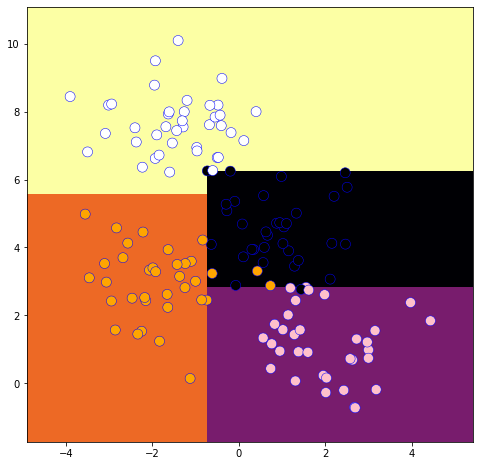

In [105]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8, 8))

n_classes = 4
plot_colors = ['black', 'pink','orange','white']
plot_step = 0.02

x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1

xx, yy =  np.meshgrid(np.arange (x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))

predicted = clf4.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)


plt.pcolormesh(xx, yy, predicted, cmap='inferno')

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=100, 
cmap=colors, edgecolors='blue', linewidth=0.5);

### Логистическая регрессия

Нейронная сеть

In [106]:
class ColorsNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(ColorsNet, self).__init__()
        
        self.fc1 = torch.nn.Linear(2, n_hidden_neurons)
        self.activ1 = torch.nn.Sigmoid()
        self.fc3 = torch.nn.Linear(n_hidden_neurons, 4)
        self.sm = torch.nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.activ1(x)
        x = self.fc3(x)
        return x

    def inference(self, x):
        x = self.forward(x)
        x = self.sm(x)
        return x
    
colors_net = ColorsNet(5)

Оптимизатор и Лосс функция

In [107]:
loss = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(colors_net.parameters(), 
                             lr=1.0e-3)

In [ ]:
Делаем торчи

In [108]:
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

Обучение 

In [109]:
for epoch in range(5000):
    optimizer.zero_grad()
        
    preds = colors_net.forward(x_train) 
        
    loss_value = loss(preds, y_train)
    loss_value.backward()
        
    optimizer.step()
    
test_preds = colors_net.forward(x_test)
test_preds = test_preds.argmax(dim=1)
print((test_preds == y_test).float().mean())

tensor(0.8667)


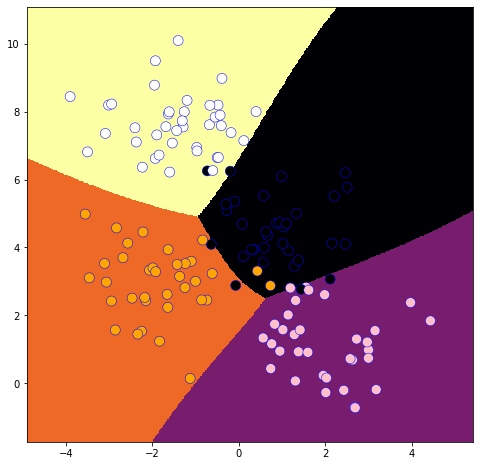

In [87]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8, 8))

n_classes = 4
plot_colors = ['black', 'pink','orange','white']
plot_step = 0.02

x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1

xx, yy =  torch.meshgrid(torch.arange(x_min, x_max, plot_step),
                         torch.arange(y_min, y_max, plot_step))

preds = colors_net.inference(
    torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1))

preds_class = preds.data.numpy().argmax(axis=1)
preds_class = preds_class.reshape(xx.shape)
plt.pcolormesh(xx, yy, preds_class, cmap='inferno')

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=100, 
cmap=colors, edgecolors='blue', linewidth=0.5);